In [2]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
np.random.seed(1234)

In [4]:
def plot_image(image):
    plt.imshow(image, cmap='gray', interpolation='nearest')
    plt.axis('off')
    
def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation='nearest')
    plt.axis('off')

In [5]:
from sklearn.datasets import load_sample_image

In [7]:
china = load_sample_image('china.jpg')
flower = load_sample_image('flower.jpg')
image = china[150:220, 130:250]
height, width, channels = image.shape
image_grayscale = image.mean(axis=2).astype(np.float32)
images = image_grayscale.reshape(1, height, width, 1)

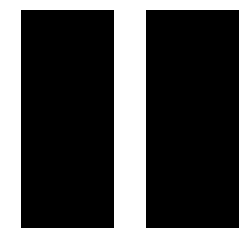

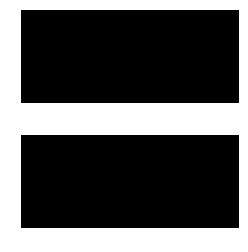

In [8]:
fmap = np.zeros(shape=(7,7,1,2), dtype=np.float32)
fmap[:,3,0,0] = 1
fmap[3,:,0,1] = 1
plot_image(fmap[:,:,0,0])
plt.show()
plot_image(fmap[:,:,0,1])
plt.show()

In [11]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=(None, height, width, 1))
feature_maps = tf.constant(fmap)
convolution = tf.nn.conv2d(X, feature_maps, strides=[1,1,1,1],
                           padding='SAME', use_cudnn_on_gpu=True)

In [12]:
with tf.Session() as sess:
    output = convolution.eval(feed_dict={X: images})

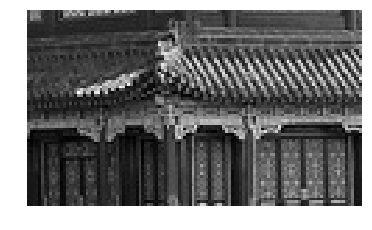

In [13]:
plot_image(images[0,:,:,0])
plt.show()

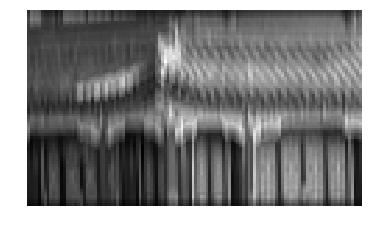

In [14]:
plot_image(output[0,:,:,0])
plt.show()

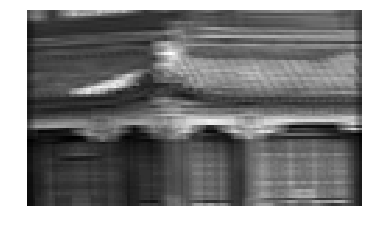

In [15]:
plot_image(output[0,:,:,1])
plt.show()

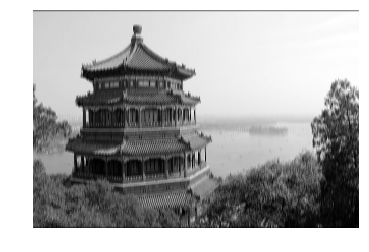

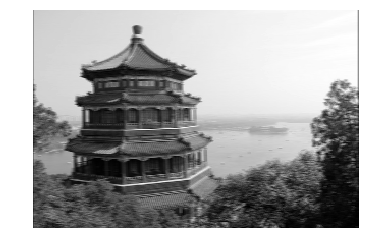

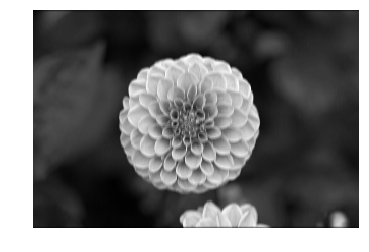

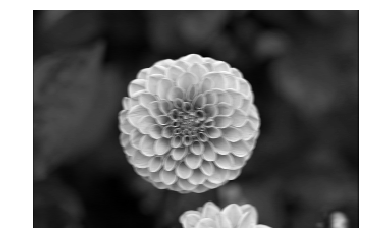

In [17]:
dataset = np.array([china, flower], dtype=np.float32)
batch_size, height, width, channels = dataset.shape

filters = np.zeros(shape=(7,7,channels,2), dtype=np.float32)
filters[:,3,:,0] = 1 # vertical line
filters[3,:,:,1] = 1 # horizontal line

X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters, strides=[1,2,2,1], padding='SAME')

with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X: dataset})

for image_index in range(2):
    for feature_map_index in range(2):
        plot_image(output[image_index, :,:, feature_map_index])
        plt.show()

### VALID vs SAME padding

In [19]:
tf.reset_default_graph()

filter_primes = np.array([2., 3., 5., 7., 11., 13.], dtype=np.float32)
x = tf.constant(np.arange(1, 13+1, dtype=np.float32).reshape([1,1,13,1]))
filters = tf.constant(filter_primes.reshape(1,6,1,1))

valid_conv = tf.nn.conv2d(x, filters, strides=[1,1,5,1], padding='VALID')
same_conv = tf.nn.conv2d(x, filters, strides=[1,1,5,1], padding='SAME')

with tf.Session() as sess:
    print('VALID: ', valid_conv.eval())
    print('SAME: ', same_conv.eval())

VALID:  [[[[ 184.]
   [ 389.]]]]
SAME:  [[[[ 143.]
   [ 348.]
   [ 204.]]]]


In [26]:
with tf.Session() as sess:
    print(filters.eval())

[[[[  2.]]

  [[  3.]]

  [[  5.]]

  [[  7.]]

  [[ 11.]]

  [[ 13.]]]]


### Pooling layer

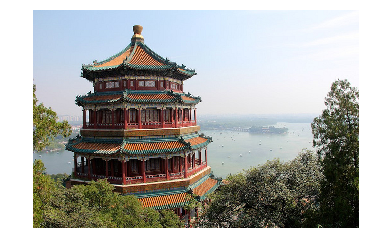

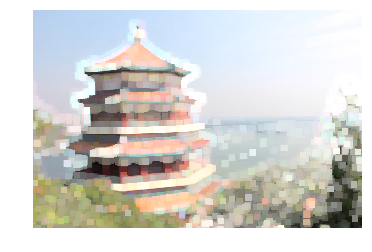

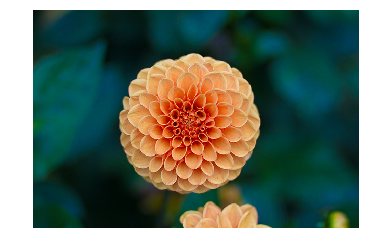

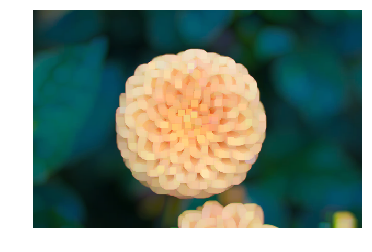

In [36]:
batch_size, height, width, channels = dataset.shape

filters = np.zeros(shape=(7,7,channels,2), dtype=np.float32)
filters[:, 3, :, 0] = 1
filters[3, :, :, 1] = 1

X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
max_pool = tf.nn.max_pool(X, ksize=[1,12,12,1], strides=[1,1,1,1], padding='VALID')

with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X: dataset})
    
plot_color_image(dataset[0])
plt.show()

plot_color_image(output[0])
plt.show()

plot_color_image(dataset[1])
plt.show()

plot_color_image(output[1])
plt.show()

### Average pooling

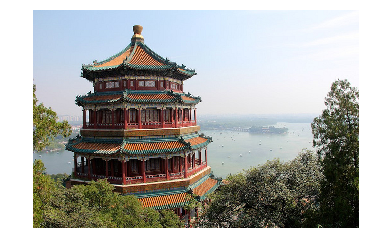

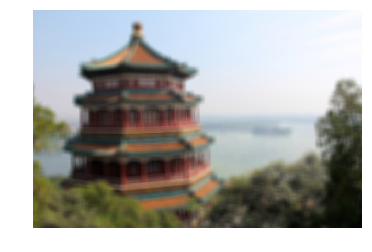

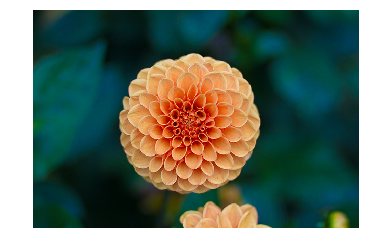

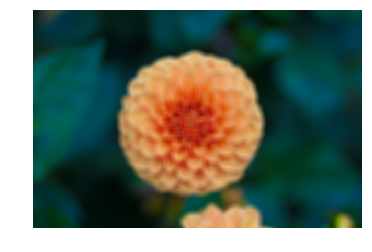

In [37]:
batch_size, height, width, channels = dataset.shape

filters = np.zeros(shape=(7,7,channels,2), dtype=np.float32)
filters[:, 3, :, 0] = 1
filters[3, :, :, 1] = 1

X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
avg_pool = tf.nn.avg_pool(X, ksize=[1,12,12,1], strides=[1,1,1,1], padding='VALID')

with tf.Session() as sess:
    output = sess.run(avg_pool, feed_dict={X: dataset})
    
plot_color_image(dataset[0])
plt.show()

plot_color_image(output[0])
plt.show()

plot_color_image(dataset[1])
plt.show()

plot_color_image(output[1])
plt.show()

### Custom minimum pooling

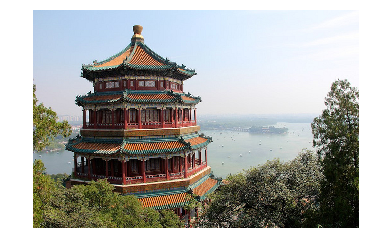

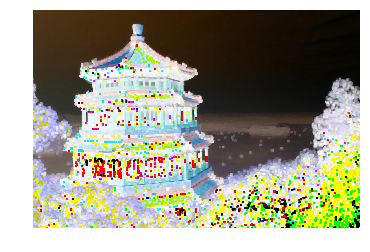

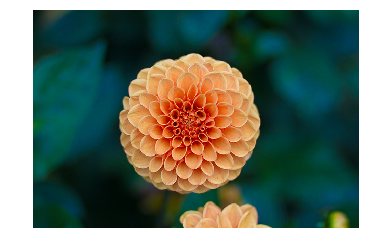

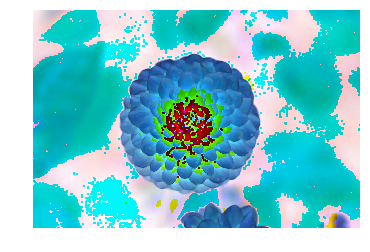

In [39]:
batch_size, height, width, channels = dataset.shape

filters = np.zeros(shape=(7,7,channels,2), dtype=np.float32)
filters[:, 3, :, 0] = 1
filters[3, :, :, 1] = 1

X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
max_pool = tf.nn.max_pool(-X, ksize=[1,4,4,1], strides=[1,1,1,1], padding='VALID')

with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X: dataset})
    
plot_color_image(dataset[0])
plt.show()

plot_color_image(output[0])
plt.show()

plot_color_image(dataset[1])
plt.show()

plot_color_image(output[1])
plt.show()